In [6]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

img.shape shows the (x-coordination, y-coordination and rgb channels)

In [7]:
img = cv2.imread('./test_images/njr-1.jpg')
img.shape 

(4366, 6210, 3)

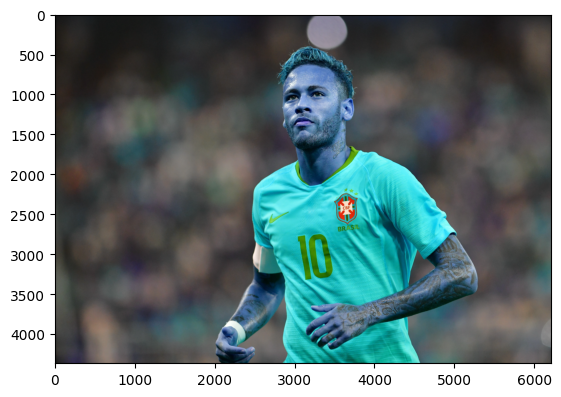

In [8]:
plt.imshow(img)

gray removes rgb channels as there will be no rgb color in gray representation

In [9]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(4366, 6210)

### gray Contains pixel intensity 0-> black 255->white

In [10]:
gray

array([[21, 22, 24, ..., 34, 32, 31],
       [24, 24, 25, ..., 37, 32, 32],
       [26, 25, 25, ..., 38, 37, 37],
       ...,
       [18, 21, 28, ..., 66, 69, 69],
       [21, 22, 26, ..., 69, 70, 70],
       [27, 26, 28, ..., 72, 70, 70]], shape=(4366, 6210), dtype=uint8)

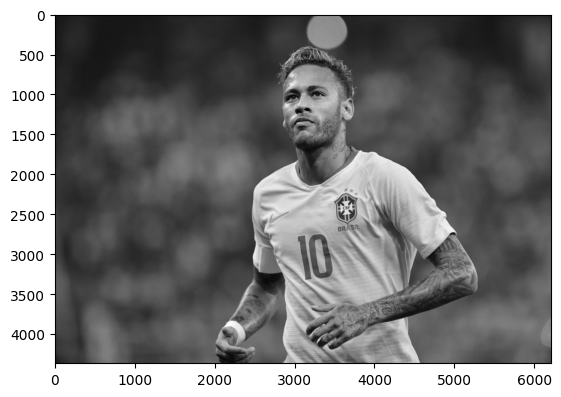

In [11]:
plt.imshow(gray,cmap='gray')

* for detecting the face and eye using haarcascade gives (x,y,width_of_face, height)
* face_cascade.detectMultiScale(version like gray or rgb, scale factor(image size to be reduced at each step), number of neighbor)

In [12]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[2665,  641,  933,  933]], dtype=int32)

In [13]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(2665), np.int32(641), np.int32(933), np.int32(933))

cv2.rectangle(image, start_point, end_point, color, boldeness of rectangle)

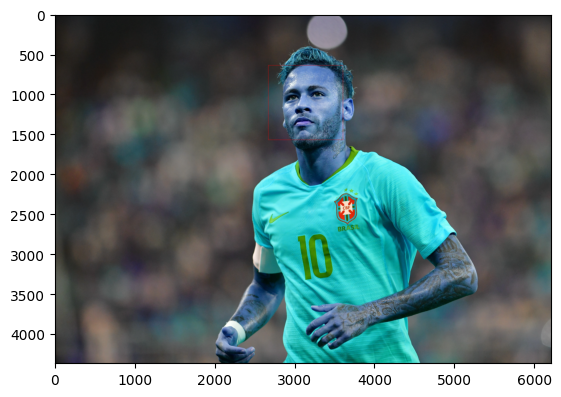

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

### 👁️ Draw Rectangles and Show Image

- `cv2.rectangle` draws colored rectangles around detected faces (blue) and eyes (green).
- We crop the face area to narrow down where to look for eyes.
- `detectMultiScale` is used again to detect eyes within each face.
- Finally, we display the image using Matplotlib to see the detected faces and eyes.


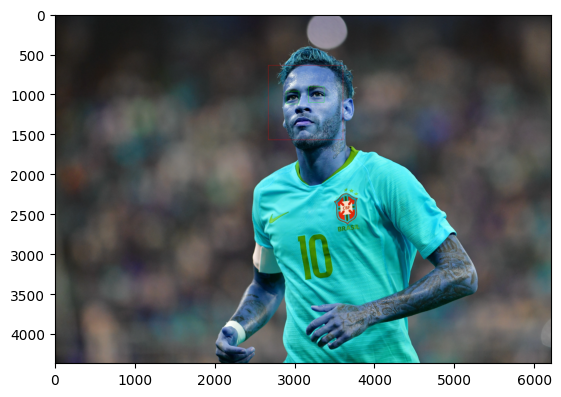

In [15]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces: #iterating through all faces
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #selecting or drawing face image
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(
    roi_gray,
    scaleFactor=1.1,
    minNeighbors=7,      # More neighbors = fewer false detections
    minSize=(20, 20),    # Skip tiny detections
    flags=cv2.CASCADE_SCALE_IMAGE
)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

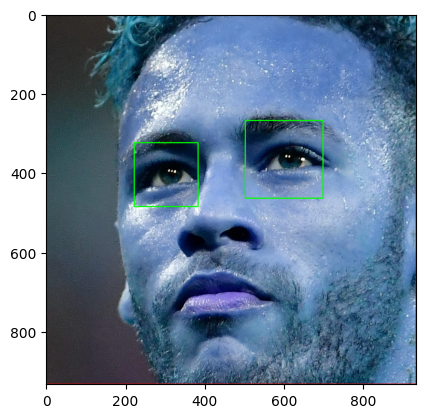

In [16]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

## Writing both face and eye detection code in one function

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image not found or unreadable: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            return roi_color

    return None  # No face with 2 eyes found

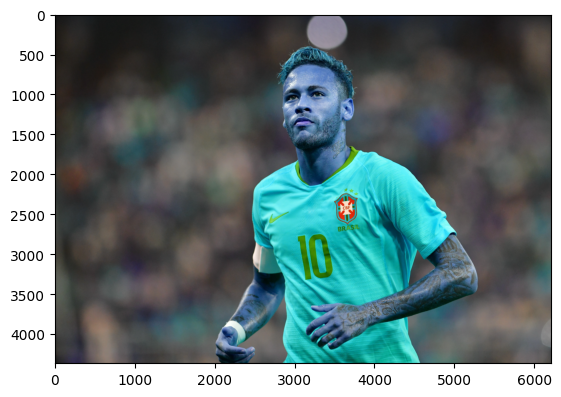

In [18]:
original_image = cv2.imread('./test_images/njr-1.jpg')
plt.imshow(original_image)

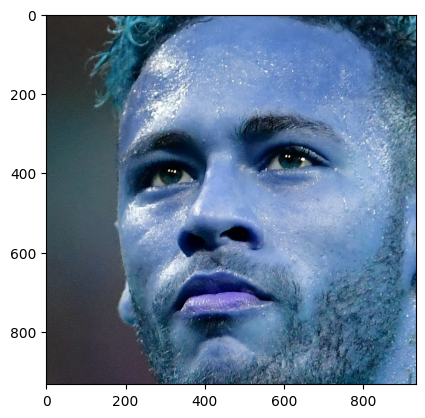

In [19]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/njr-1.jpg')
plt.imshow(cropped_image)

In [20]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

### 📂 Collecting Folder Paths

- The code scans through a main data directory.
- It finds all subdirectories (folders) inside it.
- The paths of these folders are saved in a list (`img_dirs`).
- This helps organize data by categories or classes for further processing.


In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/cropped',
 './dataset/eden_hazard',
 './dataset/luka_modric',
 './dataset/messi',
 './dataset/neymar']

#### Folder already exist garchha bhane remove garne cropped images store garna each player ko

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

### 📂 Cropping and Saving Faces by Person

- For each person's folder in the dataset:
  - Initialize a count to number cropped images.
  - Extract the person's name from the folder path.
  - Loop through each image file:
    - Crop the face with two eyes using `get_cropped_image_if_2_eyes`.
    - If a face is found:
      - Create a new folder for the cropped images if it doesn't exist.
      - Save the cropped face image in this folder with a numbered filename.
      - Record the file path in a dictionary keyed by the person's name.
- This prepares a clean, organized dataset of cropped faces for further processing or model training.


In [24]:
cropped_image_dirs = []
person_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    person_name = img_dir.split('/')[-1]
    person_file_names_dict[person_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + person_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = person_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            person_file_names_dict[person_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
Image not found or unreadable: ./dataset/cropped\cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/eden_hazard
Generating cropped images in folder:  ./dataset/cropped/luka_modric
Generating cropped images in folder:  ./dataset/cropped/messi
Image not found or unreadable: ./dataset/messi\1669759136_screenshot-2022-11-30-032814.gif
Generating cropped images in folder:  ./dataset/cropped/neymar


### 🔍 Wavelet Transform Function (`w2d`)

- Converts input image to grayscale and normalizes pixel values.
- Applies 2D wavelet decomposition to separate details and smooth parts.
- Removes the smooth (low-frequency) part to emphasize edges and textures.
- Reconstructs an image highlighting important features using wavelet details.
- Returns a grayscale image focused on edges and fine details.
- Helps improve model accuracy by providing richer information than raw images.


In [25]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

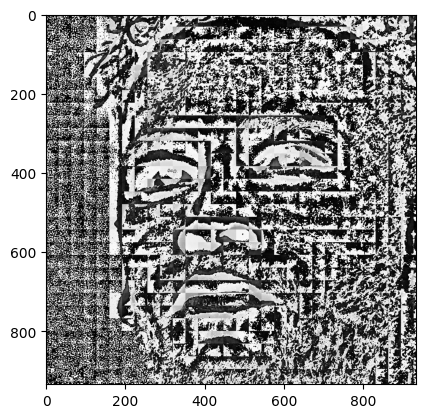

In [26]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [27]:
person_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo/cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo3.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo4.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo5.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo6.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo7.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo8.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo9.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo15.png',
  './dataset/

In [28]:
class_dict = {}
count = 0
for celebrity_name in person_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano_ronaldo': 0,
 'cropped': 1,
 'eden_hazard': 2,
 'luka_modric': 3,
 'messi': 4,
 'neymar': 5}

### Preparing Training Data (Feature Extraction)

- Initialize empty lists `X` for image features and `y` for labels.
- For each person's images:
  - Check if image file exists and can be loaded.
  - Resize raw image to 32x32 pixels for consistency.
  - Apply wavelet transform (`w2d`) and resize result to 32x32.
  - Flatten and combine raw and wavelet images into one feature vector.
  - Append feature vector to `X` and corresponding label to `y`.
- This creates a dataset of numerical features and labels ready for model training.


In [29]:
X, y = [], []

for person_name, training_files in person_file_names_dict.items():
    for training_image in training_files:
        if not os.path.exists(training_image):
            print(f"File not found: {training_image}")
            continue

        img = cv2.imread(training_image)
        if img is None:
            print(f"Failed to load image: {training_image}")
            continue

        try:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img, 'db1', 5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((
                scalled_raw_img.reshape(32*32*3, 1),
                scalled_img_har.reshape(32*32, 1)
            ))
            X.append(combined_img)
            y.append(class_dict[person_name])
        except Exception as e:
            print(f"Error processing image {training_image}: {e}")


### Reshaping and Preparing Feature Array

- Convert list `X` to NumPy array for efficient processing.
- Reshape it to `(number_of_images, 4096)` because each image is represented by 4096 features.
- Convert data type to float for compatibility with ML models.
- Checking shape with `X.shape` ensures the data is correctly formatted.


In [30]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(274, 4096)

# Model training

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### Training and Evaluating the Model

- Split data into training and testing sets to evaluate performance.
- Create a pipeline that:
  - Scales features using `StandardScaler`.
  - Trains an SVM classifier (`SVC` with RBF kernel).
- Fit (train) the model on training data.
- Score (test) the model on test data to get accuracy.


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6811594202898551

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           2       1.00      0.50      0.67        10
           3       0.61      0.79      0.69        14
           4       0.82      0.82      0.82        17
           5       0.62      0.53      0.57        15

    accuracy                           0.68        69
   macro avg       0.72      0.67      0.67        69
weighted avg       0.71      0.68      0.68        69



In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

### Machine Learning Models and Parameters

1. **Support Vector Machine (SVM)**  
   - Finds the best boundary between classes.  
   - Parameters:  
     - `C`: Controls model complexity vs. accuracy.  
     - `kernel`: 'linear' for straight line, 'rbf' for nonlinear boundaries.

2. **Random Forest Classifier**  
   - Combines many decision trees for better prediction.  
   - Parameter:  
     - `n_estimators`: Number of trees in the forest.

3. **Logistic Regression**  
   - Predicts probability of classes using a linear model.  
   - Parameter:  
     - `C`: Controls regularization strength (simpler vs. complex model).


In [47]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='lbfgs', max_iter=1000),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

### Model Selection and Hyperparameter Tuning

- We test multiple models (SVM, Random Forest, Logistic Regression).
- For each model, we try different parameters (like `C`, `kernel`, or number of trees).
- We use **GridSearchCV** to:
  - Automatically try all parameter combinations.
  - Use 5-fold cross-validation to check performance.
- The best performing model and parameters are saved.
- Results are shown in a table for easy comparison.


In [49]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.614634,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.341463,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.663415,{'logisticregression__C': 1}


In [50]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(C=1, max_iter=1000))])}

In [51]:
best_estimators['svm'].score(X_test,y_test)

0.6956521739130435

In [52]:
best_estimators['random_forest'].score(X_test,y_test)

0.463768115942029

In [53]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7246376811594203

In [41]:
best_clf = best_estimators['logistic_regression']

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  1,  0,  1,  1],
       [ 0,  7,  1,  1,  1],
       [ 0,  0, 14,  0,  0],
       [ 1,  0,  1, 13,  2],
       [ 1,  3,  3,  2,  6]])

Text(95.72222222222221, 0.5, 'Truth')

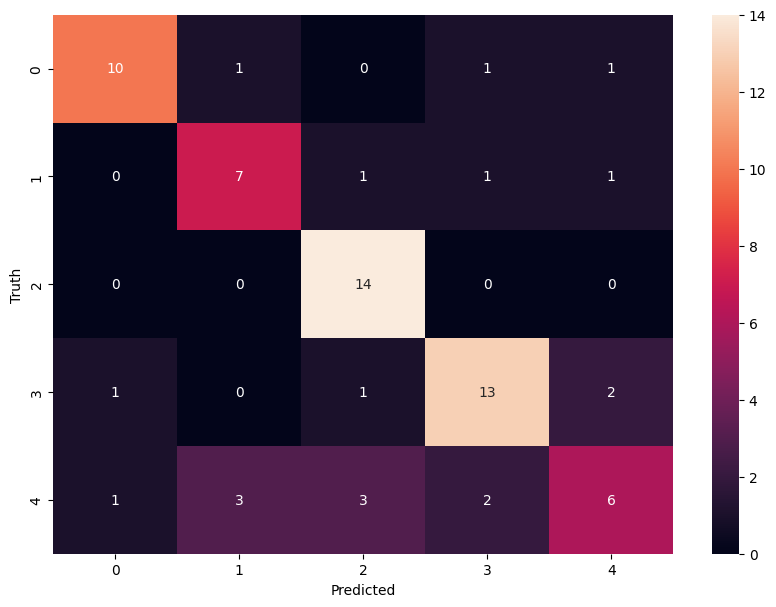

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
class_dict

{'cristiano_ronaldo': 0,
 'cropped': 1,
 'eden_hazard': 2,
 'luka_modric': 3,
 'messi': 4,
 'neymar': 5}

In [ ]:
%pip install joblib
import joblib

joblib.dump(best_clf, 'saved_model.pkl') 

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))